<a href="https://www.kaggle.com/code/daltongabrielomondi/titanic-survival-ras-ml?scriptVersionId=208003983" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Survival

In [1]:
# importing stuff

import pandas as pd # handling data
import numpy as np # computtations
import matplotlib.pyplot as plt # graphs and visualizations
import seaborn as sns # finer clearer visualizations

# from sklearn.ensemble import RandomForestClassifier # we will use this algorithm for our classification problem
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #add ons for our algo
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score # model evaluation metrics


Loading the data

In [2]:

# The Titanic dataset is split into training and test sets
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')  # Training data
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')  # Test data
gender_sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')  # Sample gender submission data


Inspect the first 5 rows of our datasets

In [3]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# to do a comprehensive analysis of the datasets. We start with the gender_sub dataset
gender_sub.describe(include='all')

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [7]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


we can briefly survey our data's statistical distribution in the above cell. 

In [8]:
full = pd.concat([train_data, test_data], axis=0, ignore_index=True) # binding training and testing data
full.info() # getting a rough idea what our data looks like 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


above here we can see that we are working with 1309 observations of 12 variables. This is the most informative and it is good practice to check info() first before other data wrangling methods to get a bird's eye view of your data.

### Feature Engineering
#### What’s in a name?
The first variable which catches my attention is passenger name because we can break it down into additional meaningful variables which can feed predictions or be used in the creation of additional new variables. For instance, passenger title is contained within the passenger name variable and we can use surname to represent families. Let’s do some feature engineering!

#### More on Feature Engineering:

Title Extraction: By analyzing the 'Name' column, the code extracts titles (e.g., Mr., Mrs., Miss) which may provide insights into passenger demographics.

Title Standardization and Grouping: Rare titles are grouped into a single category ('Rare Title') to avoid data sparsity issues and overfitting. Standardization of common titles (e.g., 'Mlle' to 'Miss') is performed for consistency.

Surname Extraction: Surnames are extracted to analyze family-related patterns, such as survival rates among family groups.


In [9]:
# Grab title from passenger names
full['Title'] = full['Name'].str.extract(r'(?<=,\s)(\w+)(?=\.\s*)')

# Show title counts by sex
title_counts = full.groupby(['Sex', 'Title']).size()
print(title_counts)

Sex     Title   
female  Dona          1
        Dr            1
        Lady          1
        Miss        260
        Mlle          2
        Mme           1
        Mrs         197
        Ms            2
male    Capt          1
        Col           4
        Don           1
        Dr            7
        Jonkheer      1
        Major         2
        Master       61
        Mr          757
        Rev           8
        Sir           1
dtype: int64


In [10]:
# Titles with very low cell counts to be combined to "Rare Title" level
rare_title = ['Dona', 'Lady', 'the Countess', 'Capt', 'Col', 'Don', 
              'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Reassign titles accordingly
full['Title'] = full['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
})

# Replace rare titles with 'Rare Title'
full['Title'] = full['Title'].apply(lambda x: 'Rare Title' if x in rare_title else x)

# Show title counts by sex again
title_counts = full.groupby(['Sex', 'Title']).size()
print(title_counts)

Sex     Title     
female  Miss          264
        Mrs           198
        Rare Title      3
male    Master         61
        Mr            757
        Rare Title     25
dtype: int64


In [11]:
# Grab surname from passenger name
full['Surname'] = full['Name'].apply(lambda x: x.split(',')[0])

# Display the first few rows to check
print(full[['Name', 'Surname']].head())

                                                Name    Surname
0                            Braund, Mr. Owen Harris     Braund
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    Cumings
2                             Heikkinen, Miss. Laina  Heikkinen
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Futrelle
4                           Allen, Mr. William Henry      Allen


In [12]:
# checking missing values
np.sum(full.isna())

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             1
Surname           0
dtype: int64

### Handling Missing Values
We noticed some missing values in the Age, Cabin, Embarked, and Fare columns. Let's deal with these missing values:

**Age:** We'll fill in missing values with the median age of each title group since the title may reflect different age distributions.

**Cabin:** This column has a lot of missing values. We could create a new feature indicating whether a passenger had a cabin or not.

**Embarked:** We'll fill missing values with the mode (most frequent value).

**Fare:** We'll fill missing values with the median fare.

In [13]:
# Fill missing Age values with the median age
full['Age'].fillna(full['Age'].median(), inplace=True)

# Create a new feature indicating whether a passenger had a cabin
full['HasCabin'] = full['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Fill missing Embarked values with the mode
full['Embarked'] = full['Embarked'].fillna(full['Embarked'].mode()[0])

# Fill missing Fare values with the median
full['Fare'] = full['Fare'].fillna(full['Fare'].median())

# checking missing values
np.sum(full.isna())

/tmp/ipykernel_18/7632363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full['Age'].fillna(full['Age'].median(), inplace=True)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             1
Surname           0
HasCabin          0
dtype: int64

## Creating New Features
**Family Size:** Combining SibSp (siblings/spouses aboard) and Parch (parents/children aboard) to create a FamilySize feature.
    
**IsAlone:** A binary feature indicating if the passenger is traveling alone.
    
**FareBin** and **AgeBin:** Binning the continuous variables Fare and Age into categorical bins to reduce model complexity and handle non-linear relationships.


In [14]:
# Create FamilySize feature
full['FamilySize'] = full['SibSp'] + full['Parch'] + 1  # Include the passenger themselves

# Create IsAlone feature
full['IsAlone'] = full['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# Create FareBin feature by categorizing Fare into bins
full['FareBin'] = pd.qcut(full['Fare'], 4, labels=[1, 2, 3, 4])  # Quantile-based binning

# Create AgeBin feature by categorizing Age into bins
full['AgeBin'] = pd.cut(full['Age'].astype(int), 5, labels=[1, 2, 3, 4, 5])  # Equal-width binning

# Display the first few rows to check the new features
print(full[['FamilySize', 'IsAlone', 'FareBin', 'AgeBin']].head())


   FamilySize  IsAlone FareBin AgeBin
0           2        0       1      2
1           2        0       4      3
2           1        1       2      2
3           2        0       4      3
4           1        1       2      3


## Visualization

In [15]:
# Setting up visualizations using Seaborn
sns.set(style="whitegrid")

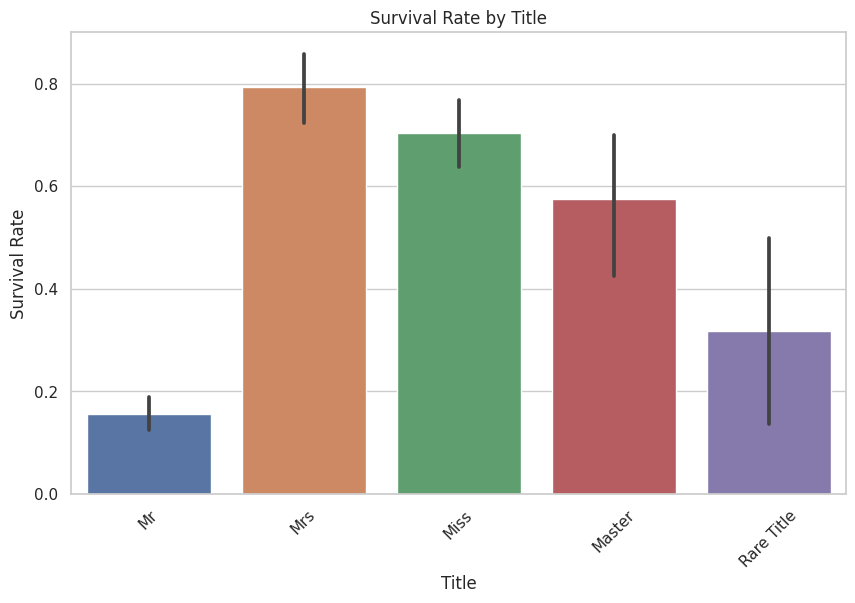

In [16]:
# Visualizing survival rate by Title
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=full[:len(train_data)])
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xlabel('Title')
plt.xticks(rotation=45)
plt.show()

From the visualization above,we see that there is a tremendously higher death rate for men(Mr) and the lowest death rate for married women(Mrs).
We will have to check if there is a correlation between them.

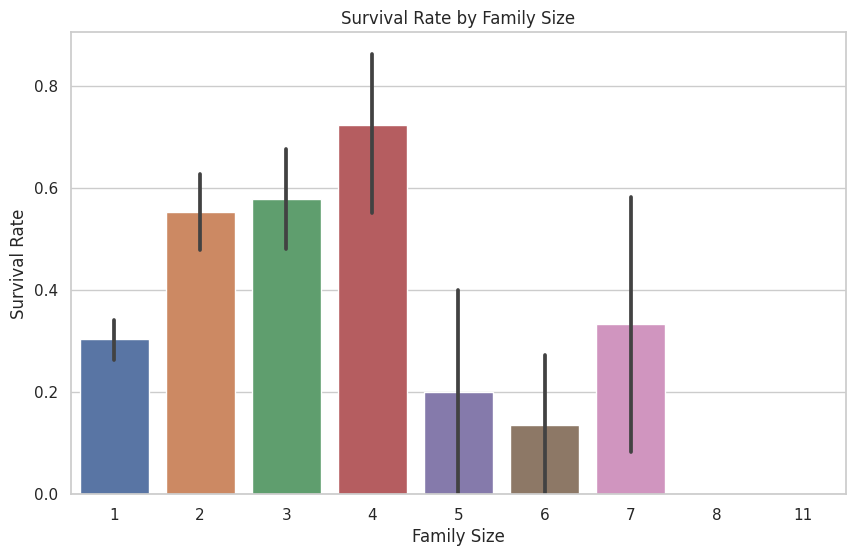

In [17]:
# Visualizing survival rate by FamilySize
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=full[:len(train_data)])
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


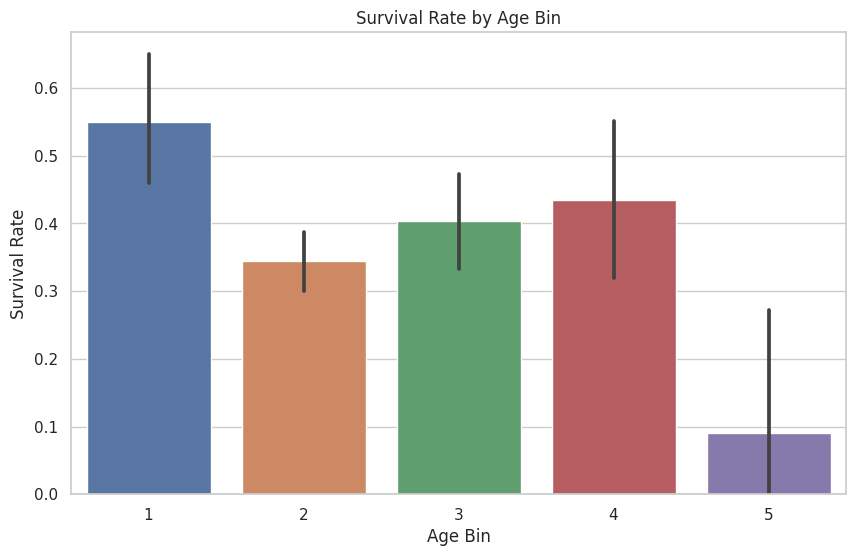

In [18]:
# Visualizing survival rate by AgeBin
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeBin', y='Survived', data=full[:len(train_data)])
plt.title('Survival Rate by Age Bin')
plt.ylabel('Survival Rate')
plt.xlabel('Age Bin')
plt.show()

age bin 1, children had the highest chances of survival

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


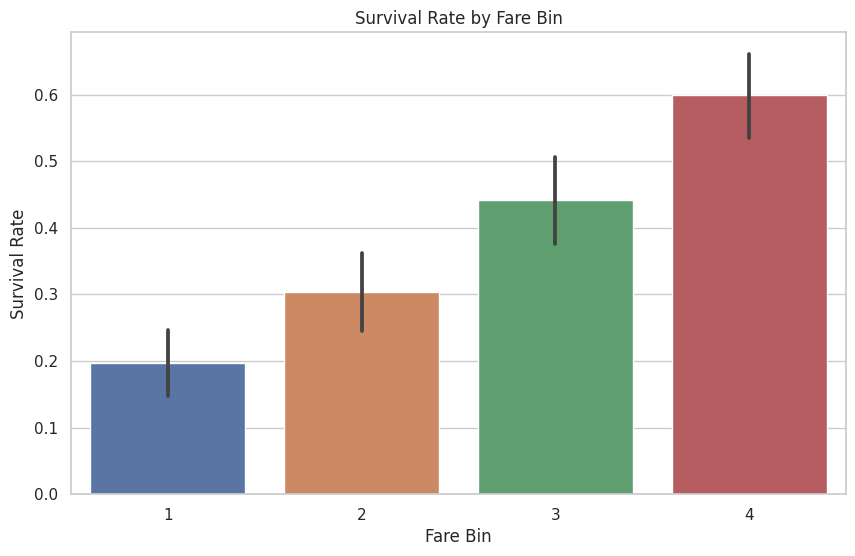

In [19]:
# Visualizing survival rate by FareBin
plt.figure(figsize=(10, 6))
sns.barplot(x='FareBin', y='Survived', data=full[:len(train_data)])
plt.title('Survival Rate by Fare Bin')
plt.ylabel('Survival Rate')
plt.xlabel('Fare Bin')
plt.show()

From this visualization, the farebin 4,the affluent, have the highest survival rate. 

next we use a correlation matrix to get more info into our dataset

In [20]:
# Segregating numerical columns
num_cols = full.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", num_cols)

# Numerical columns: Index(['Days for shipping (real)', 'Days for shipment (scheduled)','Benefit per order', ...etc

Numerical columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'HasCabin', 'FamilySize', 'IsAlone'],
      dtype='object')


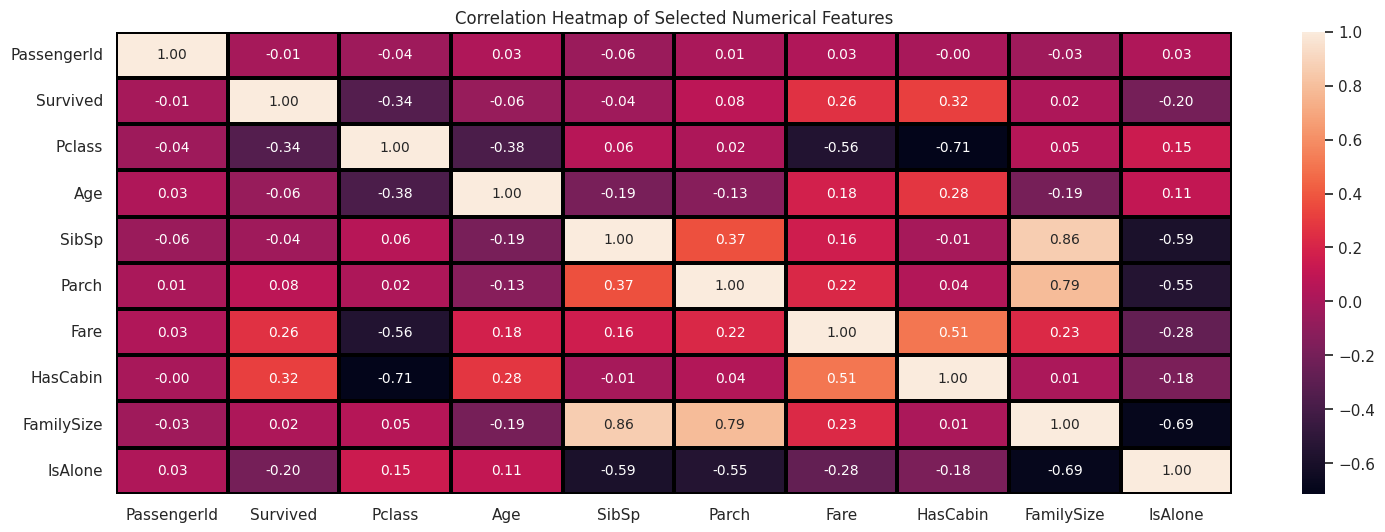

In [21]:
# Plot the correlation matrix of selected features
corr_matrix = full[num_cols].corr()
plt.figure(figsize=(18, 6))
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', annot_kws={'size': 10}, linewidths=1.5, linecolor='black')
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()


### Observation from heatmap
**Pclass and HasCabin (-0.71):**

A strong negative correlation suggests that passengers in higher classes were more likely to have cabin information available.

**Pclass and Fare (-0.56):**

A strong negative correlation indicates that higher classes (lower Pclass values) paid higher fares, which aligns with the socio-economic distinctions of the time.

**Survived and Fare (0.26):**

A positive correlation suggests that passengers who paid higher fares had a higher chance of survival. This may relate to the fact that wealthier passengers could afford better accommodations, which were likely closer to lifeboats.

**Survived and HasCabin (0.32):**

Passengers with cabin information available had a higher chance of survival. This feature might be indicative of the passenger's class and wealth.

### conclusioons
**Survival Analysis:** Passengers in higher classes, who paid higher fares and had cabin information, had better survival chances. The IsAlone feature negatively correlates with survival, suggesting that those traveling alone had lower chances of survival.

**Feature Engineering:** The **FamilySize**, **IsAlone**, **Fare**, and **HasCabin** features seem significant for predictive modeling, given their correlations with Survived.

## Next will be the Machine learning part
#### Model Selection and Training
Choosing suitable machine learning models (e.g., RandomForest, Logistic Regression, etc.), training them on the dataset, and tuning hyperparameters.
#### Model Evaluation
Using cross-validation, confusion matrices, accuracy scores, and other metrics to evaluate model performance.
#### Predictions
Generating predictions on the test set and comparing them against the provided gender_submission to measure accuracy.


Model Selection
Based on the cross-validation scores, we can select the model with the highest mean accuracy for further tuning. Let's see which model performed best:


#### Preparing Data for Modeling
Before we proceed to model training, let's prepare our dataset by encoding categorical features and splitting the data back into training and test sets.

In [22]:
full_encoded=full.drop(['Embarked', 'Title', 'Sex'], axis=1)
# Display the encoded DataFrame
full_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Surname,HasCabin,FamilySize,IsAlone,FareBin,AgeBin
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,Braund,0,2,0,1,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Cumings,1,2,0,4,3
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,Heikkinen,0,1,1,2,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Futrelle,1,2,0,4,3
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,Allen,0,1,1,2,3


In [23]:
# Defining the feature set and target variable
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
            'FamilySize', 'IsAlone', 'FareBin', 'AgeBin', 'HasCabin']

X_train = full_encoded[:len(train_data)][features]  # Features for training
y_train = full_encoded[:len(train_data)]['Survived']  # Target variable for training

X_test = full_encoded[len(train_data):][features]  # Features for testing

# Display the first few rows of the training set to verify
print(X_train.head())

   Pclass   Age  SibSp  Parch     Fare  FamilySize  IsAlone FareBin AgeBin  \
0       3  22.0      1      0   7.2500           2        0       1      2   
1       1  38.0      1      0  71.2833           2        0       4      3   
2       3  26.0      0      0   7.9250           1        1       2      2   
3       1  35.0      1      0  53.1000           2        0       4      3   
4       3  35.0      0      0   8.0500           1        1       2      3   

   HasCabin  
0         0  
1         1  
2         0  
3         1  
4         0  


## 1. Logistic Regression
Logistic Regression is a good baseline model for binary classification tasks.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Perform cross-validation
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Print accuracy scores and the mean score
print("Logistic Regression Accuracy Scores:", logreg_scores)
print("Mean Logistic Regression Accuracy:", logreg_scores.mean())


Logistic Regression Accuracy Scores: [0.62569832 0.7247191  0.71348315 0.76404494 0.76404494]
Mean Logistic Regression Accuracy: 0.7183980917707614


### 2. Random Forest Classifier
Random Forest is a powerful ensemble method that often performs well in classification tasks.

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
rf_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')

# Print accuracy scores and the mean score
print("Random Forest Accuracy Scores:", rf_scores)
print("Mean Random Forest Accuracy:", rf_scores.mean())

Random Forest Accuracy Scores: [0.69832402 0.67977528 0.71348315 0.69662921 0.71910112]
Mean Random Forest Accuracy: 0.7014625572782625



### 3. Support Vector Machine (SVM)
Support Vector Machines are useful for finding the optimal hyperplane that separates classes in the feature space.

In [26]:
from sklearn.svm import SVC

# Initialize SVM model
svm = SVC(kernel='linear', random_state=42)

# Perform cross-validation
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

# Print accuracy scores and the mean score
print("SVM Accuracy Scores:", svm_scores)
print("Mean SVM Accuracy:", svm_scores.mean())

SVM Accuracy Scores: [0.6424581  0.70786517 0.69101124 0.7247191  0.73033708]
Mean SVM Accuracy: 0.6992781369656644


In [27]:
# Display the mean accuracy for each model
model_scores = {
    "Logistic Regression": logreg_scores.mean(),
    "Random Forest": rf_scores.mean(),
    "SVM": svm_scores.mean()
}

best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]

print(f"Best Model: {best_model_name} with Mean Accuracy: {best_model_score}")

Best Model: Logistic Regression with Mean Accuracy: 0.7183980917707614


## Fine-Tuning the Best Model
After selecting the best model, we can perform hyperparameter tuning using GridSearchCV to optimize its performance. Let's proceed with that.

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.7396899127487289
